# 230208 머신러닝

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)

In [4]:
diabete = load_diabetes()

In [5]:
diabete.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [9]:
pd.options.display.float_format = '{:.3f}'.format
np.set_printoptions(precision=2, suppress=True)

In [10]:
diabete.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [29]:
def eval_score(y_test, y_pred):
    """evaluate predict value with test value and print-> mse, rmse, r2
    return: (mse, rmse,r2)
    """
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'mse = {mse:.4f}')
    print(f'rmse = {rmse:.4f}')
    print(f'r2 = {r2:.4f}')
    return (mse, rmse, r2)


In [15]:
X = diabete.data
y = diabete.target

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=27)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

reg = lr.fit(X_train, y_train)

In [19]:
# 회귀계수, 절편 확인
# _ 들어간 것은 클래스 인스턴스 
reg.coef_

array([  42.13, -256.72,  585.67,  300.38, -870.33,  492.32,  184.86,
        262.17,  772.19,   54.45])

In [22]:
reg.intercept_

150.8602523396147

In [20]:
coef = reg.coef_

In [21]:
intercept = reg.intercept_

In [30]:
y_pred = reg.predict(X_test)
eval_score(y_test, y_pred)


mse = 2712.4894
rmse = 52.0816
r2 = 0.3953


(2712.489402668732, 52.08156490226395, 0.3953449548693435)

In [32]:
# 각각의 독립변수의 설명력 확인
coef = pd.Series(coef, index=diabete.feature_names)
coef

age     42.133
sex   -256.724
bmi    585.668
bp     300.379
s1    -870.333
s2     492.321
s3     184.859
s4     262.172
s5     772.186
s6      54.447
dtype: float64

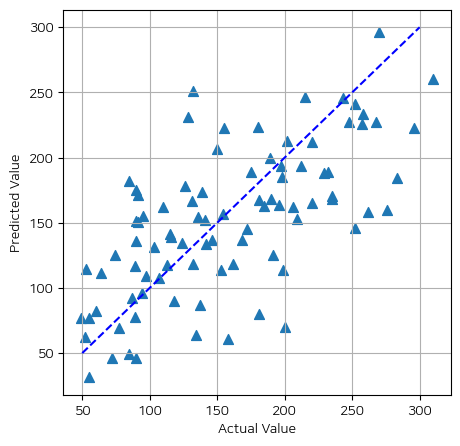

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50, marker='^') #다중선형회귀에서는 전부 뿌려줄 수 없으니 예측값과 실제값의 관계를 볼 것임
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot([50,300],[50,300], ls='--', c ='b')
plt.grid()


In [37]:
diab_df= pd.DataFrame(diabete.data, columns=diabete.feature_names)
corr_df = diab_df.corr()
# 0.4~ 0.6은 상관이 있다고 볼 수 있다 


<AxesSubplot: >

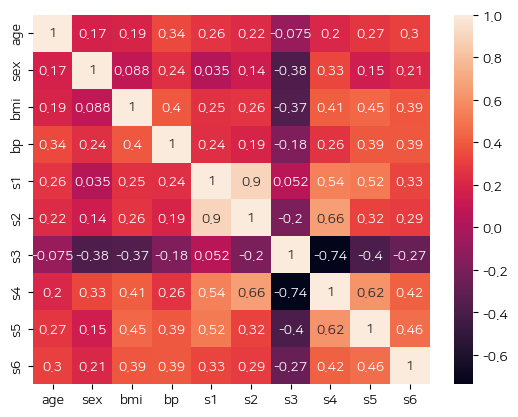

In [38]:
#씨본은 데이터 프레임과 관련 깊음 
sns.heatmap(corr_df, annot=True)

In [39]:
# 위 히트맵을 통해 s1,s2 그리고 s3, s4가 깊은 상관관계를 보이는 것을 알 수 있다 
# 무조건 버리는 건 아님. 

In [40]:
# 캘리포니아 주택 가격 
import os 
os.getcwd()

'/Users/minholee/playdata/machinelearning'

<img src="data/img/image.png" width="450" height='450'/>

```html
<img src="data/img/image.png" width="450" height='450'/>
```
이 표기를 통해 이미지를 불러올 수 있다.

In [45]:
# from sklearn.datasets
from sklearn import datasets

dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerb

In [46]:
# fetch: 메모리에 올리지 않고 인터넷에 있는 데이터를 가져오겠다 하는 녀석들임 
# 즉 fetch 하는 애들은 인터넷에 연결되어 있을 때만 사용

In [47]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [48]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [50]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [52]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [53]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [54]:
#pandas df이 보기 진짜 편함 
#housing_df 에 타겟 열을 추가하고 데이터를 입력하시오 

In [55]:
housing_df["Price"] = housing.target

In [57]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.325,41.000,6.984,1.024,322.000,2.556,37.880,-122.230,4.526
1,8.301,21.000,6.238,0.972,2401.000,2.110,37.860,-122.220,3.585
2,7.257,52.000,8.288,1.073,496.000,2.802,37.850,-122.240,3.521
3,5.643,52.000,5.817,1.073,558.000,2.548,37.850,-122.250,3.413
4,3.846,52.000,6.282,1.081,565.000,2.181,37.850,-122.250,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.560,25.000,5.045,1.133,845.000,2.561,39.480,-121.090,0.781
20636,2.557,18.000,6.114,1.316,356.000,3.123,39.490,-121.210,0.771
20637,1.700,17.000,5.206,1.120,1007.000,2.326,39.430,-121.220,0.923
20638,1.867,18.000,5.330,1.172,741.000,2.123,39.430,-121.320,0.847


In [59]:
# 기초통계량 보기 
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,3.871,28.639,5.429,1.097,1425.477,3.071,35.632,-119.570,2.069
std,1.900,12.586,2.474,0.474,1132.462,10.386,2.136,2.004,1.154
min,0.500,1.000,0.846,0.333,3.000,0.692,32.540,-124.350,0.150
25%,2.563,18.000,4.441,1.006,787.000,2.430,33.930,-121.800,1.196
50%,3.535,29.000,5.229,1.049,1166.000,2.818,34.260,-118.490,1.797
75%,4.743,37.000,6.052,1.100,1725.000,3.282,37.710,-118.010,2.647
max,15.000,52.000,141.909,34.067,35682.000,1243.333,41.950,-114.310,5.000


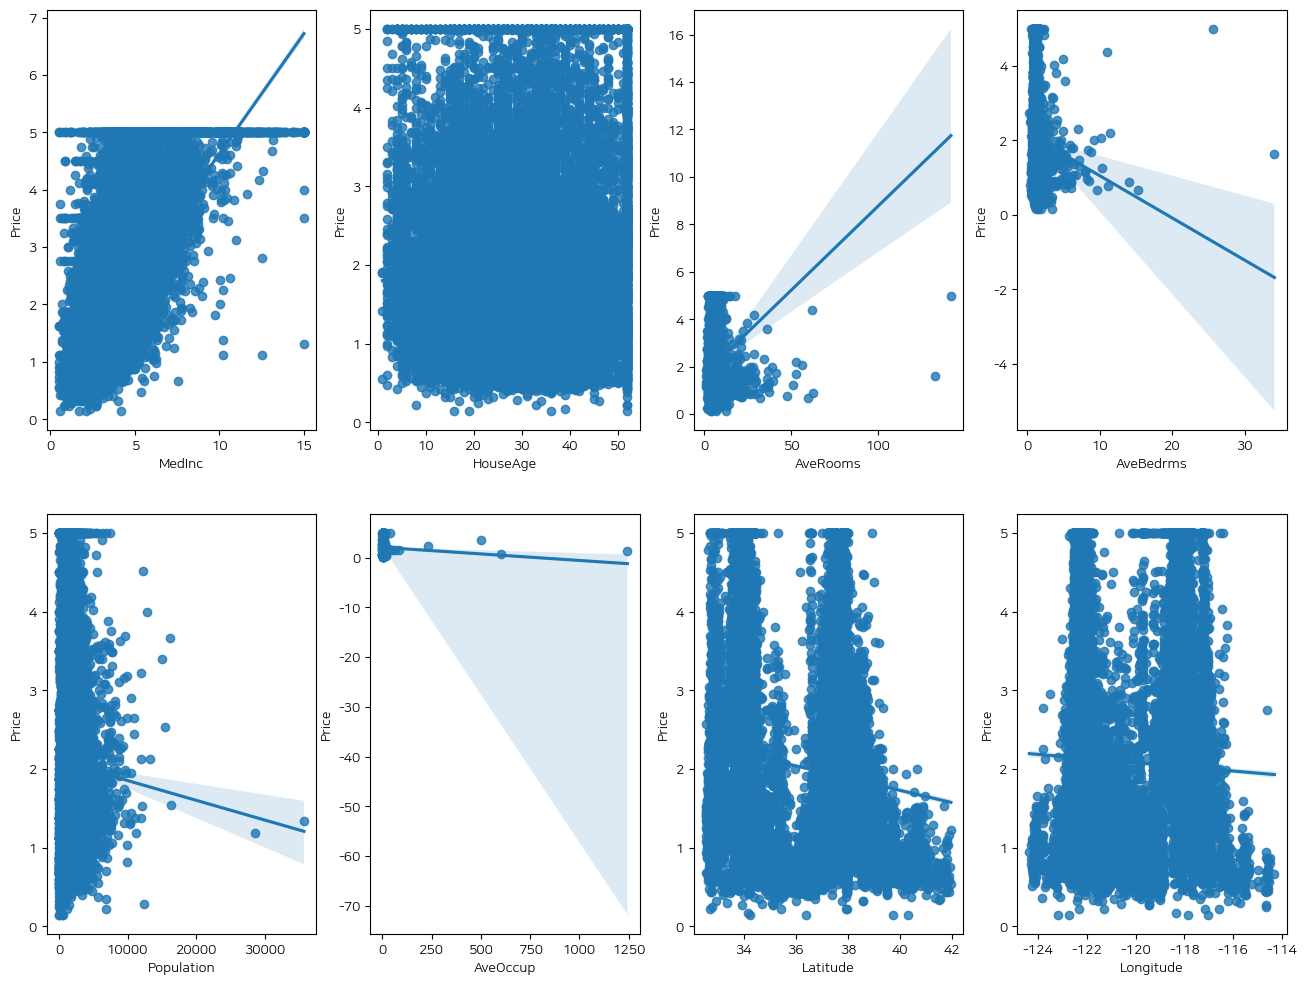

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# y 축은 가격으로 고정, x축은 각 feature 들이 순회하며 들어옴 

fig, axs = plt.subplots(figsize = (16, 12), nrows=2, ncols=4)

x_features = housing.feature_names

for i, feature in enumerate(x_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y="Price", data=housing_df, ax=axs[row][col])

In [61]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000,-0.119,0.327,-0.062,0.005,0.019,-0.080,-0.015,0.688
HouseAge,-0.119,1.000,-0.153,-0.078,-0.296,0.013,0.011,-0.108,0.106
AveRooms,0.327,-0.153,1.000,0.848,-0.072,-0.005,0.106,-0.028,0.152
AveBedrms,-0.062,-0.078,0.848,1.000,-0.066,-0.006,0.070,0.013,-0.047
Population,0.005,-0.296,-0.072,-0.066,1.000,0.070,-0.109,0.100,-0.025
AveOccup,0.019,0.013,-0.005,-0.006,0.070,1.000,0.002,0.002,-0.024
Latitude,-0.080,0.011,0.106,0.070,-0.109,0.002,1.000,-0.925,-0.144
Longitude,-0.015,-0.108,-0.028,0.013,0.100,0.002,-0.925,1.000,-0.046
Price,0.688,0.106,0.152,-0.047,-0.025,-0.024,-0.144,-0.046,1.000


<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

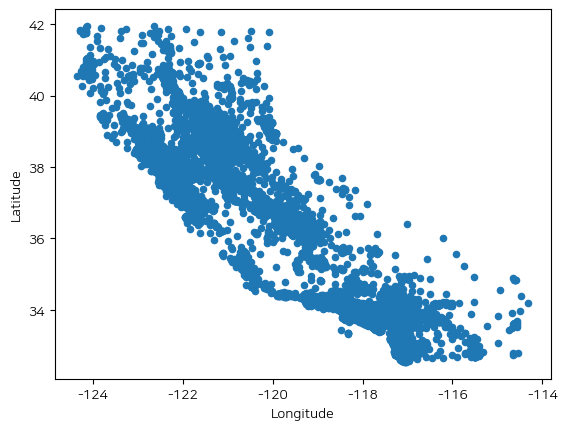

In [62]:
#판다스 데이터프레임으로 바로 쏠 수 있음 
#위경도 데이터 시각화 

housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude')

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

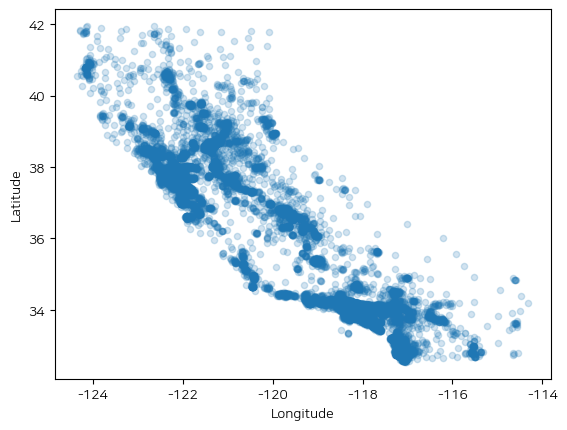

In [63]:
# 알파는 투명도임
housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude', alpha=0.2)

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

<Figure size 1000x1200 with 0 Axes>

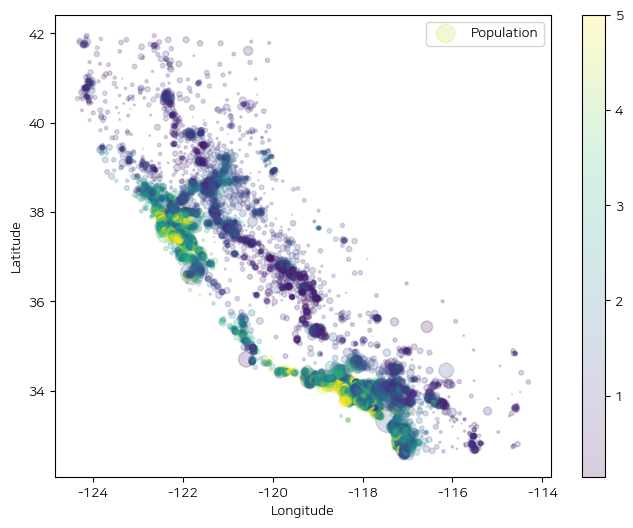

In [68]:
#위경도 정보에 따라 블록별로 산점도를 그리되 거주 인구수에 비례하게 점의 크기를 정하고, 주택 가격에 따라 점의 색깔을 다르게
plt.figure(figsize=(10,12))
housing_df.plot(kind='scatter', x = 'Longitude', y='Latitude', alpha=0.2, s = housing_df["Population"]/100,
                 c = housing_df["Price"], colormap=plt.get_cmap('viridis'), figsize=(8,6), 
                 label = 'Population')

<AxesSubplot: >

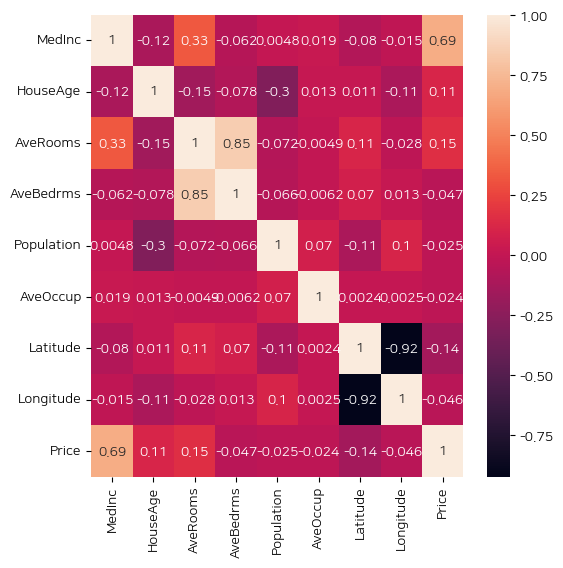

In [69]:
# 상관계수 히트맵

ccol = housing_df.columns

corr = housing_df[ccol].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True)

In [70]:
X=housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [71]:

lr = LinearRegression()
reg = lr.fit(X_train, y_train)
coef = reg.coef_
intercept = reg.intercept_

In [72]:
y_pred = reg.predict(X_test)
eval_score(y_test, y_pred)

mse = 0.5423
rmse = 0.7364
r2 = 0.5887


(0.5423293447570146, 0.7364301356931386, 0.5886851927020098)

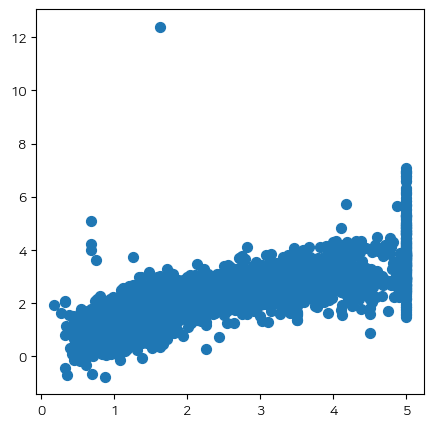

In [73]:
# 결과 시각화 

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=50)

In [74]:
# 다른 모델을 생각해보자
# 버리거나 새로운 데이터를 수집 
# 특성 공학의 방법, 알고리즘 변경, 모델 변경 

In [78]:
#coef
print(coef)
coef = pd.Series(coef, index= housing.feature_names)
coef

MedInc        0.444
HouseAge      0.010
AveRooms     -0.120
AveBedrms     0.798
Population    0.000
AveOccup     -0.003
Latitude     -0.423
Longitude    -0.437
dtype: float64


MedInc        0.444
HouseAge      0.010
AveRooms     -0.120
AveBedrms     0.798
Population    0.000
AveOccup     -0.003
Latitude     -0.423
Longitude    -0.437
dtype: float64

---


# 선형 회귀식의 계수를 찾는 법 - OLS VS. SGD
- 보스턴 집값 데이터 활용(RM VS Price)

### 필요한 모듈 import

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 필요한 라이브러리 import 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#데이터셋을 로드

from sklearn import datasets 
boston = datasets.fetch_openml('boston')

/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/Users/minholee/.pyenv/versions/3.9.4/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# 1. LinearRegression 모델을 사용한 경우

# 2. SGDRegressor with hyperparameter

# 3. SGDRegressor with scaling

# 4. SGDRegressor with StandardScaler()